In [ ]:
# 根据https://zhuanlan.zhihu.com/p/149579648学习基础代码

# 深度学习的 4 大步骤：1、数据定义；2、model 定义；3、找损失函数，优化器；4、模型训练过程

In [3]:
# 1、数据处理
from torch.utils.data import Dataset

In [21]:
x_data = [1,2,3]
y_data = [2,4,6]

# 设置初始权重
w = 1

In [14]:
def forward(x):
    return x*w

def cost(xs, ys):
    cost = 0
    for x, y in zip(xs, ys):
        # 求 y 的预测值
        y_pred = forward(x)
        # 求目标函数，MSE
        cost += (y_pred - y) **2
    return cost / len(xs)

def gradient(xs, ys):
    # 计算梯度
    grad = 0
    for x, y in zip(xs, ys):
        # 对目标函数进行求导
        grad += 2*x*(x*w-y)
    return grad/len(xs)

print('predict (before training)', 4, forward(4))
epoch_list = []
loss_list = []
for epoch in range(100):
    # 计算 loss，观察目标函数的日志
    cost_val = cost(x_data, y_data)
    # 计算更新的梯度
    grad_val = gradient(x_data, y_data)
    # 更新
    w -= 0.01* grad_val
    loss_list.append(cost_val)
    epoch_list.append(epoch)
    print('EPOCH:', epoch, 'W=', w, 'loss=', cost_val)
print('Predict (after training)', 4, forward(4))

predict (before training) 4 7.999777758621207
EPOCH: 0 W= 1.9999496252874736 loss= 1.4405775547323328e-08
EPOCH: 1 W= 1.9999543269273095 loss= 1.1842187756547517e-08
EPOCH: 2 W= 1.9999585897474272 loss= 9.73480465527282e-09
EPOCH: 3 W= 1.999962454704334 loss= 8.002442084652284e-09
EPOCH: 4 W= 1.9999659589319294 loss= 6.578363057677792e-09
EPOCH: 5 W= 1.9999691360982828 loss= 5.407706805106763e-09
EPOCH: 6 W= 1.9999720167291097 loss= 4.445375336336258e-09
EPOCH: 7 W= 1.9999746285010596 loss= 3.654296098708337e-09
EPOCH: 8 W= 1.9999769965076273 loss= 3.0039938062398064e-09
EPOCH: 9 W= 1.9999791435002487 loss= 2.469416419574488e-09
EPOCH: 10 W= 1.9999810901068922 loss= 2.0299700487455895e-09
EPOCH: 11 W= 1.999982855030249 loss= 1.6687256009798603e-09
EPOCH: 12 W= 1.9999844552274257 loss= 1.371766609548254e-09
EPOCH: 13 W= 1.999985906072866 loss= 1.1276531204725252e-09
EPOCH: 14 W= 1.9999872215060652 loss= 9.269809829497494e-10
EPOCH: 15 W= 1.999988414165499 loss= 7.620195671191381e-10
EPO

In [22]:
def forward(x):
    return x*w

def loss(x, y):
    # 求 y 的预测值
    y_pred = forward(x)
    # 求目标函数，MSE
    return (y_pred - y) **2

def gradient(x, y):
    # 随机梯度下降，对每一个样本的梯度进行更新
    return 2*x*(x*w-y)

print('predict (before training)', 4, forward(4))
epoch_list = []
loss_list = []
for epoch in range(100):
    for x, y in zip(x_data, y_data):
        grad = gradient(x, y)
        # 更新
        w = w - 0.01* grad_val
        print("\tgrad:", x, y, grad)
        l = loss(x, y )
    
    loss_list.append(l)
    epoch_list.append(epoch)
    print('EPOCH:', epoch, 'W=', w, 'loss=', cost_val)
print('Predict (after training)', 4, forward(4))

predict (before training) 4 4
	grad: 1 2 -2
	grad: 2 4 -7.999999997457804
	grad: 3 6 -17.99999998856012
EPOCH: 0 W= 1.0000000009533234 loss= 5.409676005437524e-17
	grad: 1 2 -1.9999999980933532
	grad: 2 4 -7.999999989831217
	grad: 3 6 -17.999999971400296
EPOCH: 1 W= 1.0000000019066468 loss= 5.409676005437524e-17
	grad: 1 2 -1.9999999961867063
	grad: 2 4 -7.9999999822046295
	grad: 3 6 -17.999999954240476
EPOCH: 2 W= 1.0000000028599703 loss= 5.409676005437524e-17
	grad: 1 2 -1.9999999942800595
	grad: 2 4 -7.999999974578042
	grad: 3 6 -17.999999937080656
EPOCH: 3 W= 1.0000000038132937 loss= 5.409676005437524e-17
	grad: 1 2 -1.9999999923734126
	grad: 2 4 -7.999999966951455
	grad: 3 6 -17.999999919920832
EPOCH: 4 W= 1.000000004766617 loss= 5.409676005437524e-17
	grad: 1 2 -1.9999999904667658
	grad: 2 4 -7.999999959324867
	grad: 3 6 -17.99999990276101
EPOCH: 5 W= 1.0000000057199405 loss= 5.409676005437524e-17
	grad: 1 2 -1.999999988560119
	grad: 2 4 -7.99999995169828
	grad: 3 6 -17.999999885

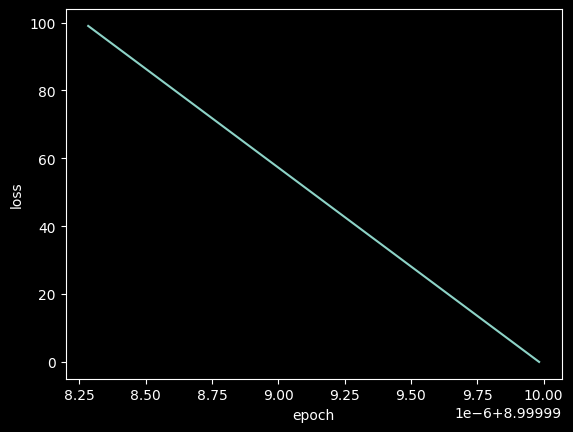

In [23]:
import matplotlib.pyplot as plt


# 绘制曲线图
plt.plot(loss_list, epoch_list)

# 添加标题和标签
plt.xlabel('epoch')
plt.ylabel('loss')

# 显示图形
plt.show()


In [1]:
import torch

x_data = [1, 2, 3, 4]
y_data = [2, 4, 6, 8]

In [2]:
w = torch.tensor([1.0])

# w 会需要计算梯度
w.requires_grad = True


# 定义一个线性模型
def forward(x):
    # 因为 w 需要梯度，所以计算出来的 y 也需要梯度
    return x*w

def loss(x, y):
    y_pred = forward(x)
    # 每调用一次 loss，就会构建一次计算图
    return(y_pred - y)**2

print("predict (before training)", 4, forward(4).item())

for epoch in range(100):
    for x, y in zip(x_data, y_data):
        # 根据这一步，算出来的梯度会被存到 w 里面
        l = loss(x, y)
        # 做了 backward 计算图就会被释放
        l.backward()
        #  item 也是去标量
        print('\tgrad:', x, y, w.grad.item())
        # w.grad是一个 tensor，如果不取 data 会继续求梯度，会产生计算图
        # 更新使用标量不用张量
        w.data = w.data - 0.01 * w.grad.data
        # w 里面梯度的数据做清零
        w.grad.data.zero_()
    print("progress:", epoch, l.item())
print("predictf (after training)", 4, forward(4).item())

predict (before training) 4 4.0
	grad: 1 2 -2.0
	grad: 2 4 -7.840000152587891
	grad: 3 6 -16.228801727294922
	grad: 4 8 -23.657981872558594
progress: 0 8.745314598083496
	grad: 1 2 -1.0054643154144287
	grad: 2 4 -3.941420555114746
	grad: 3 6 -8.15874195098877
	grad: 4 8 -11.893630981445312
progress: 1 2.2102882862091064
	grad: 1 2 -0.5054793357849121
	grad: 2 4 -1.9814786911010742
	grad: 3 6 -4.101662635803223
	grad: 4 8 -5.979312896728516
progress: 2 0.5586278438568115
	grad: 1 2 -0.2541208267211914
	grad: 2 4 -0.9961538314819336
	grad: 3 6 -2.062039375305176
	grad: 4 8 -3.0059967041015625
progress: 3 0.14118775725364685
	grad: 1 2 -0.12775492668151855
	grad: 2 4 -0.5007991790771484
	grad: 3 6 -1.0366544723510742
	grad: 4 8 -1.5112113952636719
progress: 4 0.03568374738097191
	grad: 1 2 -0.06422638893127441
	grad: 2 4 -0.2517671585083008
	grad: 3 6 -0.5211582183837891
	grad: 4 8 -0.7597312927246094
progress: 5 0.009018619544804096
	grad: 1 2 -0.032288551330566406
	grad: 2 4 -0.12657070

In [4]:
# 练习题 
w1 = torch.tensor([1.0])
w2 = torch.tensor([1.0])
b = torch.tensor([1.0])

# w 会需要计算梯度
w1.requires_grad = True
w2.requires_grad = True
b.requires_grad = True


# 定义一个线性模型
def forward(x):
    # 因为 w 需要梯度，所以计算出来的 y 也需要梯度
    return w1*x*x + w2*x + b

def loss(x, y):
    y_pred = forward(x)
    # 每调用一次 loss，就会构建一次计算图
    return(y_pred - y)**2

for epoch in range(100):
    for x, y in zip(x_data, y_data):
        l = loss(x, y)
        l.backward()
        print('\tgrad', x, y, w1.grad.item(), w2.grad.item(), b.grad.item())
        w1.data = w1.data - 0.01 * w1.grad.data
        w2.data = w2.data - 0.01 * w2.grad.data
        
        w1.grad.data.zero_()
        w2.grad.data.zero_()
    print("progress:", epoch, l.item())
    
print("predictf (after training)", 4, forward(4).item())

	grad 1 2 2.0 2.0 2.0
	grad 2 4 23.040000915527344 11.520000457763672 7.760000228881836
	grad 3 6 78.13440704345703 26.044801712036133 16.441600799560547
	grad 4 8 -162.89590454101562 -40.723976135253906 6.26060676574707
progress: 0 25.91316032409668
	grad 1 2 3.2176132202148438 3.2176132202148438 9.478219985961914
	grad 2 4 41.75189208984375 20.875946044921875 19.91619300842285
	grad 3 6 137.51364135742188 45.83788299560547 35.19548797607422
	grad 4 8 -300.56817626953125 -75.14204406738281 16.409976959228516
progress: 1 88.2238540649414
	grad 1 2 5.683526039123535 5.683526039123535 22.093502044677734
	grad 2 4 79.18916320800781 39.594581604003906 41.89079284667969
	grad 3 6 255.54232788085938 85.18077850341797 70.28438568115234
	grad 4 8 -575.3894653320312 -143.8473663330078 34.32254409790039
progress: 2 323.3135070800781
	grad 1 2 10.65078353881836 10.65078353881836 44.97332763671875
	grad 2 4 154.13885498046875 77.06942749023438 83.50804138183594
	grad 3 6 491.04644775390625 163.682